In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
from google.colab import files
uploaded = files.upload()

# Print the keys in the uploaded dictionary
print("Keys in uploaded:", uploaded.keys())

Saving HR Promotion.csv to HR Promotion.csv
Keys in uploaded: dict_keys(['HR Promotion.csv'])


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['HR Promotion.csv']))

In [20]:
# Basic dataset exploration
print("Head of the dataset:\n", df.head())
print("Tail of the dataset:\n", df.tail())
print("Info of the dataset:\n", df.info())
print("Describe the dataset:\n", df.describe())
print("Missing values:\n", df.isnull().sum())
# To remove rows with any null values
df= df.dropna()
print("Missing values:\n", df.isnull().sum())
# If you want to remove rows with null values only in specific columns
# df_cleaned = df.dropna(subset=['column1', 'column2'])

# If you want to remove columns with any null values
# df_cleaned = df.dropna(axis=1)


Head of the dataset:
    employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0    

In [21]:
# Count employees with age less than 35 before filtering
count_before_filter = df[df['age'] < 35].shape[0]
print(f"Number of employees with age less than 35 before filtering: {count_before_filter}")

# Count employees with age more than 35 before filtering
count_before_filter_old = df[df['age'] > 35].shape[0]
print(f"Number of employees with age less than 35 before filtering: {count_before_filter_old}")


# Filter records with age greater than 35
age_filter = df[df['age'] > 35]
print(age_filter)

# Count employees with age less than 35 after filtering
count_after_filter = age_filter[age_filter['age'] < 35].shape[0]
print(f"Number of employees with age less than 35 after filtering: {count_after_filter}")

# Count employees with age more than 35 after filtering
count_after_filter_remaining = age_filter[age_filter['age'] > 35].shape[0]
print(f"Number of employees with age more than 35 after filtering: {count_after_filter_remaining}")


Number of employees with age less than 35 before filtering: 25927
Number of employees with age less than 35 before filtering: 20096
       employee_id         department     region         education gender  \
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
12           60051  Sales & Marketing   region_4        Bachelor's      m   
13           38401         Technology  region_29  Master's & above      m   
14           77040                R&D   region_2  Master's & above      m   
...            ...                ...        ...               ...    ...   
54794        35000         Operations  region_16        Bachelor's      m   
54798        40257  Sales & Marketing   region_2  Master's & above      f   
54799        68093        Procurement   region_2  Master's & above      f   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592   

In [22]:
# Group by department and calculate average length of service
avg_length_of_service = df.groupby('department')['length_of_service'].mean()

# Find the department with the longest and shortest average service
longest_service_department = avg_length_of_service.idxmax()
shortest_service_department = avg_length_of_service.idxmin()

print(avg_length_of_service)
print(f"The longest average service is in the {longest_service_department} department.")
print(f"The shortest average service is in the {shortest_service_department} department.")


department
Analytics            5.381562
Finance              5.304642
HR                   6.212885
Legal                5.301038
Operations           6.731772
Procurement          6.668725
R&D                  4.937290
Sales & Marketing    6.449961
Technology           6.321132
Name: length_of_service, dtype: float64
The longest average service is in the Operations department.
The shortest average service is in the R&D department.


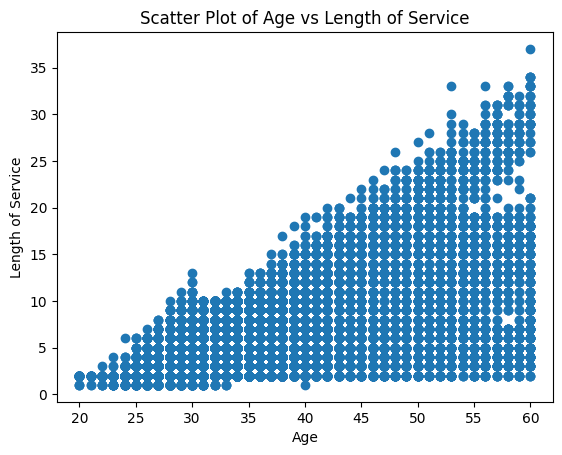

In [23]:
import matplotlib.pyplot as plt

# Scatter plot of age and length of service
plt.scatter(df['age'], df['length_of_service'])
plt.title('Scatter Plot of Age vs Length of Service')
plt.xlabel('Age')
plt.ylabel('Length of Service')
plt.show()


In [24]:
# Filter for employees from the Finance department, with age > 35 and who are promoted
finance_promoted = df[(df['department'] == 'Finance') & (df['age'] > 35) & (df['is_promoted'] == 1)]

# Count the number of such employees
count_finance_promoted = finance_promoted.shape[0]

# Print the result
print(f"Number of promoted people from Finance department with age greater than 35: {count_finance_promoted}")


Number of promoted people from Finance department with age greater than 35: 22


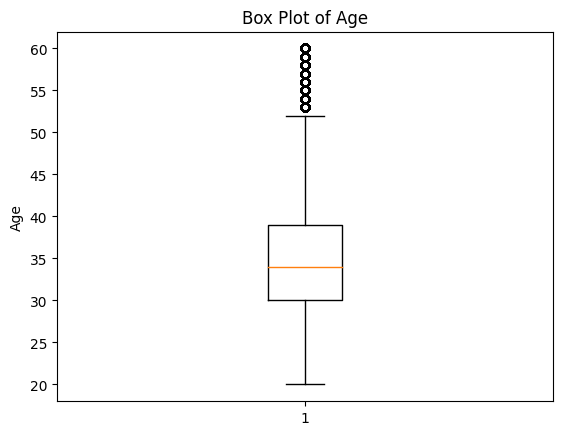

In [25]:
# Box plot of age
plt.boxplot(df['age'])
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()
